### 출처:  도서 <이것이 데이터 분석이다 with 파이썬>  윤기태 저


# 국가별 음주 데이터 분석

이번에는 국가별 음주 데이터를 활용하여 탐색적 데이터 분석 과정에 조금 더 익숙해져보자.
우선 데이터 분석에 사용할 라이브러리들을 불러오고, 해당 음주 데이터 파일을 데이터프레임 형태로 불러와보자.
그리고 데이터의 대략적인 정보를 확인하자.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_path = '../data_with_python/drinks.csv'
drinks = pd.read_csv(file_path)
print(drinks.info())
drinks.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
 5   continent                     170 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ KB
None


,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
5,Antigua & Barbuda,102,128,45,4.9,NaN
6,Argentina,193,25,221,8.3,SA
7,Armenia,21,179,11,3.8,EU
8,Australia,261,72,212,10.4,OC
9,Austria,279,75,191,9.7,EU


나머지 피처의 수치적 정보를 살펴보자. describe() 함수를 실행해보자.

In [3]:
drinks.describe()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,193.000000,193.000000,193.000000,193.000000
mean,106.160622,80.994819,49.450777,4.717098
std,101.143103,88.284312,79.697598,3.773298
min,0.000000,0.000000,0.000000,0.000000
25%,20.000000,4.000000,1.000000,1.300000
50%,76.000000,56.000000,8.000000,4.200000
75%,188.000000,128.000000,59.000000,7.200000
max,376.000000,438.000000,370.000000,14.400000


다음으로 피처 간의 상관관계를 살펴보자. 피처 간의 상관 관계를 통계적으로 탐색하는 방법은 크게 두가지이다. 첫번째 방법은 피터가 2개일 때, 상관 계수를 계산하는 단순 상관 분석 방법이며, 두번째는 대상 피처가 여러 개일 때 상호 간의 연관성을 분석하는 다중 상관 분석 방법이다. 이번에 사용할 방법은 단순 상관 분석 방법이다.

cf) 상관분석
: 상관 분석이란 두 변수 간의 선형적 관계를 상관 계수로 표현하는 것이다. 상관 계수를 구하는 것은 공분산의 개념을 포함한다. 공분산은 2개의 확률 변수에 대한 상관 정도로, 2개의 변수 중 하나의 값이 상승하는 경향을 보일 때 다른 값도 상승하는 경향을 수치로 나타낸 것이다. 하지만 공분산만으로 두 확률 변수의 상관 관계를 구하는 것은 두 변수의 단위 크기 등의 문제로 무리가 있다. 따라서 이를 -1과 1 사이의 값으로 변환하여 계산하는 것을 상관 계수라고 한다. 만약 상관 계수가 1에 가깝다면 서로 강한 양의 상관 관계가 있는 것이고, -1에 가깝다면 음의 상관 관계가 있는 것이다.  

이번에 상관 관계를 살펴볼 대상은 beer_servings, wine_servings, spirit_servings, total_litres_of_pure_alcohol 이렇게 4개의 피처이다. 이 피처는 술의 종류만 다를 뿐, 비슷한 의미를 가지는 피처들이기 때문이다. 
먼저 맥주와 와인 소비량의 상관 관계를 알아보자. corr() 함수를 적용한다. 이를 통해 피처 간의 상관 계수를 matrix의 형태로 출력할 수 있다.

In [5]:
# beer_servings, wine_servings 두 피처간의 상관 계수 계산
# pearson은 상관 계수를 구하는 계산 방법 중 하나이며, 널리 쓰임
corr = drinks[['beer_servings', 'wine_servings']].corr(method = 'pearson')
print(corr)

               beer_servings  wine_servings
beer_servings       1.000000       0.527172
wine_servings       0.527172       1.000000


이제 모든 피처들을 각각 1대 1로 비교하여 살펴보자.

In [6]:
# 피처간 상관 계수 행렬 구하기
cols = ['beer_servings', 'spirit_servings', 'wine_servings','total_litres_of_pure_alcohol']
corr = drinks[cols].corr(method = 'pearson')
print(corr)

                              beer_servings  spirit_servings  wine_servings  \
beer_servings                      1.000000         0.458819       0.527172   
spirit_servings                    0.458819         1.000000       0.194797   
wine_servings                      0.527172         0.194797       1.000000   
total_litres_of_pure_alcohol       0.835839         0.654968       0.667598   

                              total_litres_of_pure_alcohol  
beer_servings                                     0.835839  
spirit_servings                                   0.654968  
wine_servings                                     0.667598  
total_litres_of_pure_alcohol                      1.000000  


이를 조금 더 쉽게 실행하기 위해 'heatmap', 'pairplot'이라는 기법을 사용해보자. 파이썬의 seaborn 시각화 라이브러리를 활용하자.
heatmap의 경우 corr.values를, pairplot의 경우 데이터프레임을 파라미터로 넣어준다.

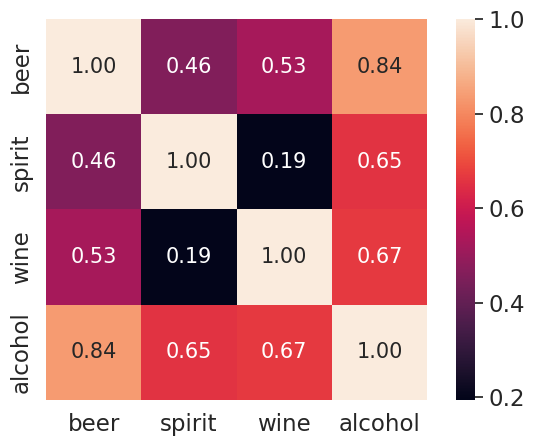

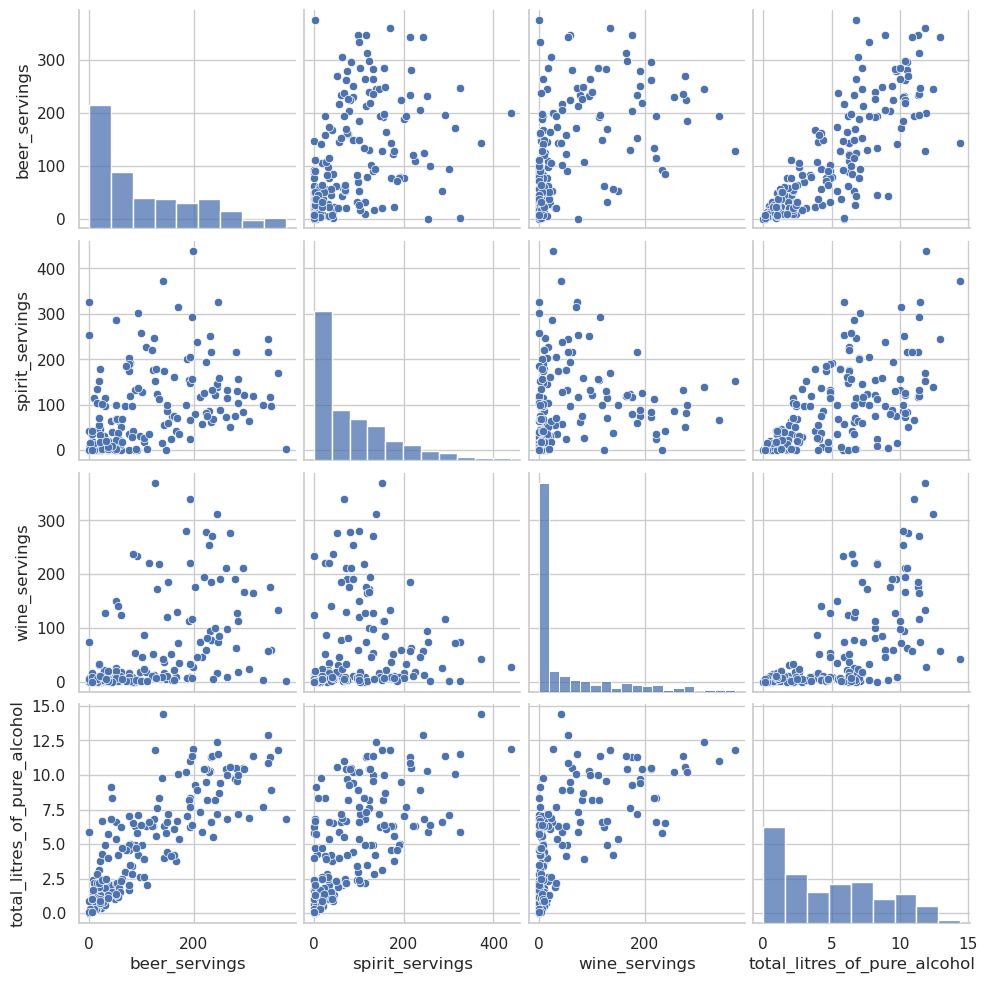

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# corr 행렬 히트맵 시각화
cols_view = ['beer', 'spirit', 'wine', 'alcohol']  # 그래프 출력을 위한 cols 이름 축약
sns.set(font_scale = 1.5)
hm = sns.heatmap(corr.values,
                cbar = True,
                annot = True,
                square = True,
                fmt = '.2f',
                annot_kws = {'size':15},
                yticklabels = cols_view,
                xticklabels = cols_view)

plt.tight_layout()
plt.show()

# 시각화 라이브러리를 이용한 피처 간의 산점도 그래프 출력
sns.set(style = 'whitegrid', context = 'notebook')
sns.pairplot(drinks[['beer_servings','spirit_servings', 'wine_servings', 'total_litres_of_pure_alcohol']], height = 2.5)

plt.show()

위의 그래프를 살펴보면 total_litres_of_pure_alcohol 피처가 대체적으로 모든 피처와 상관 관계가 있는 것으로 보이며, 특히 beer_servings와의 상관성이 매우 높은 것으로 보인다.

이제 본격적인 탐색에 앞서 continent 피처에 존재하는 결측 데이터를 처리해보자. 대륙에 대한 정보가 없는 국가를 'Others', 줄여서 'OT'라는 대륙으로 새롭게 정의하자. fillna() 함수를 사용하여 데이터프레임의 continet 피처의 결측값을 OT로 채워주자.

In [13]:
# 결측 데이터 처리
drinks['continent'] = drinks['continent'].fillna('OT')
drinks.head(10)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
5,Antigua & Barbuda,102,128,45,4.9,OT
6,Argentina,193,25,221,8.3,SA
7,Armenia,21,179,11,3.8,EU
8,Australia,261,72,212,10.4,OC
9,Austria,279,75,191,9.7,EU


이번에는 전체 대륙 중에서 OT가 차지하는 비율이 얼마나 되는지 파이차트로 확인해보자. ple.pie() 함수를 사용해보자.

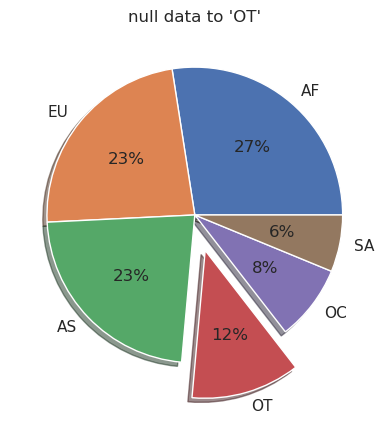

In [16]:
labels = drinks['continent'].value_counts().index.tolist()
fracs1 = drinks['continent'].value_counts().values.tolist()
explode = (0, 0, 0, 0.25, 0, 0)
plt.pie(fracs1, explode = explode, labels = labels, autopct = '%.0f%%', shadow = True)
plt.title('null data to \'OT\'')
plt.show()

이제 이 가공된 데이터들을 토대로 탐색적인 질문을 하나씩 해보자.

### 대륙별 spirit_servings의 통계적 정보는 어느 정도 일까?

agg() 함수를 사용하여 대륙 단위로 분석을 수행해보자. agg() 함수는 apply() 함수와 거의 동일한 기능을 하지만, apply()에 들어가는 함수 파라미터를 병렬로 설정하여 그룹에 대한 여러가지 연산 결과를 동시에 얻을 수 있는 함수이다. 대륙별 'spirit_servings'의 통계적 정보를 구하기 위해서는 agg에 ['mean', 'min', 'max', 'sum'] 파라미터를 입력하는 것만으로도 간단히 탐색이 가능하다.

In [17]:
# 대륙별 spirit_servings의 평균, 최소, 최대, 합계를 계산
result = drinks.groupby('continent').spirit_servings.agg(['mean','min','max','sum'])
result.head()

,mean,min,max,sum
continent,,,,
AF,16.339623,0,152,866
AS,60.840909,0,326,2677
EU,132.555556,0,373,5965
OC,58.437500,0,254,935
OT,165.739130,68,438,3812


### 전체 평균보다 많은 알코올 섭취 대륙은 어디일까?

In [18]:
# 전체 평균보다 많은 알코올 섭취 대륙 구하기 : mean()함수 사용
total_mean = drinks.total_litres_of_pure_alcohol.mean()
continent_mean = drinks.groupby('continent')['total_litres_of_pure_alcohol'].mean()
continent_over_mean = continent_mean[continent_mean >= total_mean]
print(continent_over_mean)

continent
EU    8.617778
OT    5.995652
SA    6.308333
Name: total_litres_of_pure_alcohol, dtype: float64


### 평균 beer_servings가 가장 높은 대륙은 어디일까?

mean() 함수만을 이용한 탐색에서 idxmax() 함수를 적용하면 평균 'beer_servings'가 가장 높은 대륙이 어디인지 찾을 수 있다. idxmax()는 시리즈 객체에서 값이 가장 큰 index를 반환하는 기능을 수행한다. 

In [19]:
# 평균 beer_servings가 가장 높은 대륙 구하기
beer_continent = drinks.groupby('continent').beer_servings.mean().idxmax()
print(beer_continent)

EU


위의 탐색들을 통하여 대륙들 중 OT,AS만이 평균보다 많이 알코올을 섭취하는 대륙인 것을 알 수 있다. 또한 맥주를 가장 좋아하는 대륙은 유럽이라는 결과를 얻을 수 있다.

### 시각화

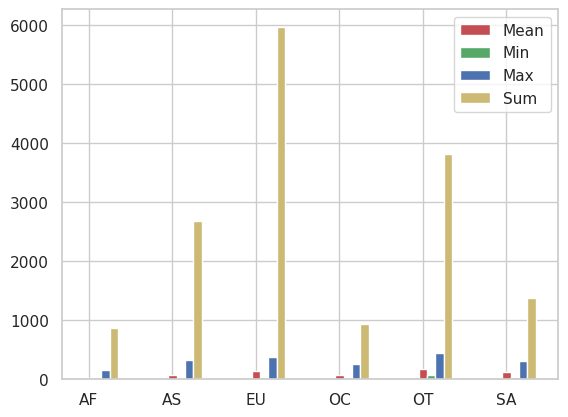

In [21]:
# 대륙별 spirit_servings의 평균, 최소, 최대, 합계를 시각화
n_groups = len(result.index)
means = result['mean'].tolist()
mins = result['min'].tolist()
maxs = result['max'].tolist()
sums = result['sum'].tolist()

index = np.arange(n_groups)
bar_width = 0.1

rects1 = plt.bar(index, means, bar_width, color='r', label='Mean')
rects2 = plt.bar(index + bar_width, mins, bar_width, color='g', label='Min')
rects3 = plt.bar(index + bar_width *2, maxs, bar_width, color='b', label='Max')
rects4 = plt.bar(index + bar_width *3, sums, bar_width, color='y', label='Sum')

plt.xticks(index, result.index.tolist())
plt.legend()
plt.show()

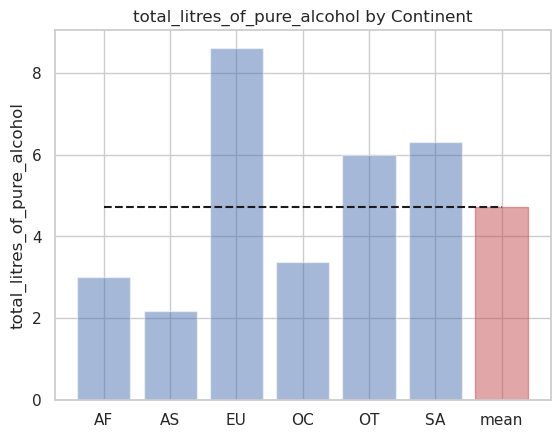

In [23]:
# 대륙별 total_litres_of_pure_alcohol 시각화
continents = continent_mean.index.tolist()
continents.append('mean')
x_pos = np.arange(len(continents))
alcohol = continent_mean.tolist()
alcohol.append(total_mean)

bar_list = plt.bar(x_pos, alcohol, align='center', alpha = 0.5)
bar_list[len(continents) - 1].set_color('r')
plt.plot([0., 6], [total_mean, total_mean], 'k--')
plt.xticks(x_pos, continents)

plt.ylabel('total_litres_of_pure_alcohol')
plt.title('total_litres_of_pure_alcohol by Continent')

plt.show()

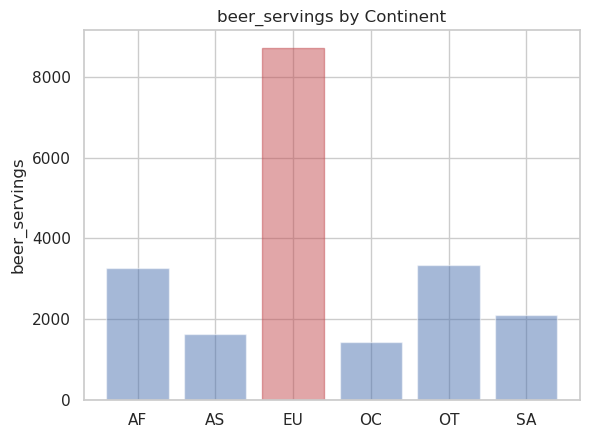

In [24]:
# 대륙별 beer_servings 시각화
beer_group = drinks.groupby('continent')['beer_servings'].sum()
continents = beer_group.index.tolist()
y_pos = np.arange(len(continents))
alcohol = beer_group.tolist()

bar_list = plt.bar(y_pos, alcohol, align = 'center', alpha = 0.5)
bar_list[continents.index("EU")].set_color('r')
plt.xticks(y_pos, continents)
plt.ylabel('beer_servings')
plt.title('beer_servings by Continent')

plt.show()

지금까지는 피처간의 상관성을 살펴보았다. 이러한 방식은 데이터에서 인사이트를 도출하는데 있어서 매우 유용한 방법이지만 분석가의 주관에 따라 도출된 내용이라는 한계를 지닌다. 따라서 분석 자체에 타당성을 부여하기 위해 통계적으로 차이를 검정하는 과정이 필요하다. 그 중 가장 기본적인 방법인 t-test를 활용해보자. 

cf) t-test
: t-test란 두 집단 간 평균의 차이에 대한 검정 방법으로, 모집단의 평균 등과 같이 실제 정보를 모를 때 현재의 데이터만으로 두 집단의 차이에 대해 검정할 수 있는 방법이다. 단 t-test는 검정 대상인 두 집단의 데이터 개수가 비슷하면서 두 데이터가 정규 분포를 보이는 경우에 신뢰도가 높은 방식이다.

파이썬에서는 scipy라는 라이브러리를 활용하여 두 집단 간의 t-test를 검정할 수 있다. ttest_ind() 함수에 두 집단의 시리즈 데이터를 넣는 것으로 검정의 결과를 확인할 수 있는데, 이 함수의 파라미터인 equal_var는 t-test의 두가지 방법 중에 하나를 선택하는 것이다. 첫번째는 두 집단의 분산이 같은 경우, 두번째는 두 집단의 분산이 같지 않은 경우를 가정한 것이다.

In [27]:
# 아프리카와 유럽 간의 맥주 소비량 차이를 검정
africa = drinks.loc[drinks['continent'] == 'AF']
europe = drinks.loc[drinks['continent'] == 'EU']

from scipy import stats
tTestResult = stats.ttest_ind(africa['beer_servings'], europe['beer_servings'])
tTestResultDiffVar = stats.ttest_ind(africa['beer_servings'],europe['beer_servings'], equal_var=False)

print("The t-static and p-value assuming equal variances is %.3f and %.3f" %tTestResult)

print("The t-static and p-value assuming equal variances is %.3f and %.3f" %tTestResultDiffVar)

The t-static and p-value assuming equal variances is -7.268 and 0.000
The t-static and p-value assuming equal variances is -7.144 and 0.000


위의 실행 결과에 등장하는 t-static은 t-test의 검정 통계량을 의미하는 것으로, 함께 출력되는 p-value와 연관 지어 해석해야 한다. p-value는 가설이 얼마나 믿을만한 것인지 나타내는 지표로, 데이터를 새로 샘플링 했을 때 귀무가설이 맞다는 전제 하에 현재 나온 통계값 이상이 나올 확률이라고 정의할 수 있다. 만약 p-value가 너무 낮다면 귀무 가설이 일어날 확률이 너무 낮기 때문에 귀무 가설을 기각하게 된다. 보통 그 기준은 0.05나 0.01을 기준으로 하며, 이를 p-value(유의확률)이라고 한다. 또한 귀무 가설이란 처음부터 버릴 것을 예상하는 가설이며, 가설이 맞지 않다는 것을 증명하기 위해 수립하는 가설이다. 그리고 반대되는 것을 대립 가설이라고 부르며, 귀무 가설이 거짓인 경우에 대안적으로 참이 되는 가설을 의미한다.

위의 실행 결과에서는 등분산을 가정한 케이스와 가정하지 않은 케이스 모두 p-value가 0.000이하로 나타났다. t-test의 귀무 가설은 '두 집단의 평균이 같다'이고 이 귀무 가설은 기각되었다. 따라서 '아프리카와 유럽 대륙 간의 맥주 소비량 차이'는 통계적으로 유의미하다는 결론을 내릴 수 있다. 그러나 두 집단의 데이터 크기도 다르고, 각각의 크기 또한 크지 않기 때문에 실제로 통계적인 의미를 가지는 검정이라고 보기엔 어렵다. 그냥 이러한 방법이 있다는 것만 참고로 알아두자.

이제는 '대한민국은 얼마나 독하게 술을 마시는 나라인가'라는 질문에 대한 답을 찾아보자. alcohol_rate 피처를 생성해보자. 이는 total_litres_of pure_alcohol 피처를 모든 술의 총 소비량으로 나눈 것이다. 그리고 alcohol_rate는 sort_values() 함수를 사용하여 국가를 기준으로 정렬한다.

In [28]:
# total_servings 피처를 생성
drinks['total_servings'] = drinks['beer_servings'] + drinks['wine_servings'] + drinks['spirit_servings']

# 술 소비량 대비 알코올 비율 피처를 생성
drinks['alcohol_rate'] = drinks['total_litres_of_pure_alcohol'] / drinks['total_servings']
drinks['alcohol_rate'] = drinks['alcohol_rate'].fillna(0)

# 순위 정보 생성
country_with_rank = drinks[['country', 'alcohol_rate']]
country_with_rank = country_with_rank.sort_values(by=['alcohol_rate'], ascending=0)
country_with_rank.head(5)

,country,alcohol_rate
63,Gambia,0.266667
153,Sierra Leone,0.223333
124,Nigeria,0.185714
179,Uganda,0.153704
142,Rwanda,0.151111


이 결과를 코대로 시각화를 수행해보자. x_pos = np.arange(len(country_list))를 통해 그래프의 x축에 해당하는 범위를 생성하고, rank = country_with_rank.alcohol_rate.tolist()를 통해 alcohol_rate 순으로 정렬된 데이터에서 alcohol_rate 값을 생성하자.

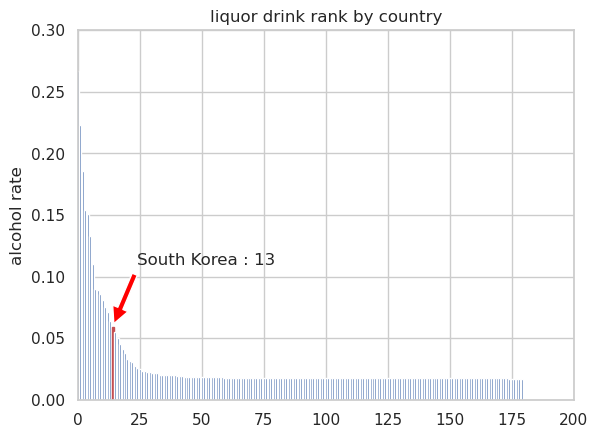

In [30]:
# 국가별 순위 정보를 그래프로 시각화
country_list = country_with_rank.country.tolist()
x_pos = np.arange(len(country_list))
rank = country_with_rank.alcohol_rate.tolist()

bar_list = plt.bar(x_pos, rank)
bar_list[country_list.index('South Korea')].set_color('r')
plt.ylabel('alcohol rate')
plt.title('liquor drink rank by country')
plt.axis([0, 200, 0, 0.3])

korea_rank = country_list.index('South Korea')
korea_alc_rate = country_with_rank[country_with_rank['country'] == 'South Korea']['alcohol_rate'].values[0]
plt.annotate('South Korea : ' + str(korea_rank -1),
            xy=(korea_rank, korea_alc_rate),
            xytext=(korea_rank + 10, korea_alc_rate + 0.05),
            arrowprops = dict(facecolor = 'red', shrink = 0.05))

plt.show()


위의 그래프를 통해 대한민국은 전 세계 200여개 국가중에서 13번째로 술을 독하게 마시는 나라라는 것을 알 수 있다.